# $$\textit{Bayes} \text{ (pronounced BAE$\cdot$z)}$$

$$\text{Schwartz}$$

<img src="stuff/bayes.tiff" width="1000px" align="left">

<img src="stuff/bayes_regs.tiff" width="1000px" align="left">

# Bayes' Rule for Events

# $$p(B|A) = \frac{p(A|B)p(B)}{p(A)} = \frac{p(A,B)}{p(A)}$$

# Bayes' Formula for Random Variables
# $$p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)} = \frac{p(X,Y)}{p(X)}$$

# Bayes' Theorem for Random Variables & Parameters (_as Random Variables_)
# $$p(\theta|X) = \frac{p(X|\theta)p(\theta)}{p(X)} = \frac{p(X,\theta)}{p(X)}$$

# Bayes' for Data Analysis

# $\begin{align}
p(\theta|X_1,X_2,\cdots,X_n) &= \frac{p(X_1,X_2,\cdots,X_n|\theta)p(\theta)}{p(X_1,X_2,\cdots,X_n)}\\{}\\ 
\text{Posterior} &= \frac{\text{Likelihood}\times\text{prior}}{\text{Marginal Likelihood}} 
\end{align}$

## _"The posterior is proportional to the likelihood times the prior"_
#### _(the marginal likelihood is just a normalizing constant)_

## $\begin{align}
\text{Posterior} &= \\
p(\theta|X_1,X_2,\cdots,X_n) &= \frac{p(X_1,X_2,\cdots,X_n|\theta)p(\theta)}{p(X_1,X_2,\cdots,X_n)}\\ 
&= \frac{p(X_1,X_2,\cdots,X_n|\theta)p(\theta)}{c} \propto  p(X_1,X_2,\cdots,X_n|\theta)p(\theta)\\
& \hspace{11.5em} \text{Likelihood } \times \text{prior}
\end{align}$



<img src="stuff/bayes.png" width="750px" align="left">

# Contrasting Frequentist and Bayesian Analysis


## $\begin{align}
\underset{\theta}{argmax}\; p(X_1,X_2,\cdots,X_n|\theta) &= \underset{\theta}{argmax}\; \; p(X_1|\theta)p(X_2|\theta)\cdots p(X_n|\theta) \quad\;\;\;\;\;\;\textbf{(1)}\\{}\\
\quad\quad p(\theta|X_1,X_2,\cdots,X_n) &\propto \quad\quad\quad\; p(X_1|\theta)p(X_2|\theta)\cdots p(X_n|\theta)p(\theta) \quad\textbf{ (2)}\\{}\\
\underset{\theta}{argmax}\; p(\theta|X_1,X_2,\cdots,X_n) &= \underset{\theta}{argmax}\;\; p(X_1|\theta)p(X_2|\theta)\cdots p(X_n|\theta)p(\theta) \quad\textbf{ (3)}
\end{align}$

### (1) Classical Frequentist Maximum Likelihood Estimation (MLE)
### (2) Full Bayesian Posterior Analysis 
### (3) Maximum $a\;posteriori$ (MAP) Estimate

In [ ]:













x_1 = 4
x_2 = 14

# prior
p_theta_1 = .2
p_theta_11 = .3
p_theta_21 = .5

# $$p(X_i|\theta) = \frac{\theta^{x_i} e^{-\theta}}{x_i!}$$

# $$
\begin{align}
p(\theta=1|x_1=4,x_2=14) &\propto ?\\ % \frac{1^{4} e^{-1}}{4!}\frac{1^{14} e^{-1}}{14!} \times .2 \\
p(\theta=11|x_1=4,x_2=14) &\propto ?\\ % \frac{11^{4} e^{-11}}{4!}\frac{11^{14} e^{-11}}{14!} \times .3 \\
p(\theta=21|x_1=4,x_2=14) &\propto ?\\ % \frac{21^{4} e^{-21}}{4!}\frac{21^{14} e^{-21}}{14!} \times .5 \\
\end{align}
$$

In [ ]:
import numpy as np
import math
21**4*np.exp(-21)/math.factorial(4) * 21**14*np.exp(-21)/math.factorial(14) * .5

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def loglikelihood(sample, model, pars):
    log_likelihood = 0
    for x in sample:
        log_likelihood = log_likelihood + np.log(getattr(stats,model).pmf(x,**pars))
    return log_likelihood

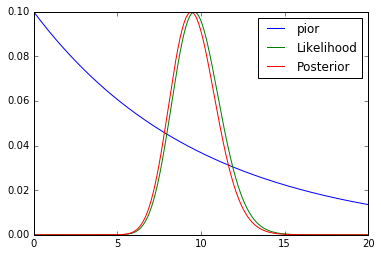

In [10]:
sample = [11,2,14,5,16]
model = "poisson"
pars = {'mu': np.linspace(0, 20, 1000)[1:]}          

prior_model = "expon"
prior_pars = {"scale": 10}        

prior = getattr(stats,prior_model).pdf(pars['mu'], **prior_pars)
scaling = max(prior)

plt.plot(pars['mu'], prior)

likelihood = np.exp(loglikelihood(sample, model, pars))
likelihood = likelihood/max(likelihood) * scaling

plt.plot(pars['mu'], likelihood)

posterior = np.exp(loglikelihood(sample, model, pars)) * getattr(stats, prior_model).pdf(pars['mu'], **prior_pars)
posterior = posterior / max(posterior) * scaling

plt.plot(pars['mu'], posterior)

plt.legend(["pior", "Likelihood", "Posterior"], loc="best")

# Poisson-Exponential posterior is Gamma
#### (This is becuase the exponential (gamma) distribution is "conjugate" to the poisson distribution)

$\begin{array}
Pp(\theta|X_1,X_2,\cdots,X_n) &\propto \lambda e^{-\lambda \theta} \prod_{i=1}^{n}\frac{\theta^{x_i} e^{-\theta}}{x_i!}\\
&\propto \theta^{^{\sum_{i=1}^{n}x_i}} e^{-(n+\lambda)\theta}\\
&\propto Gamma\left(1+\sum_{i=1}^{n}x_i, n+\lambda\right)
\end{array}$

##### And you can do whatever you want with it

# probabilistic programming
* http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/
* https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/

In [11]:
import numpy as np
import pymc as pm

parameter = pm.Exponential("poisson_param", 1./10)
data = np.array([11,2,14,5,16])
#data_generator = pm.Poisson("data_generator_observed", parameter)
data_generator = pm.Poisson("data_generator_observed", parameter, value=data, observed=True)

In [6]:
data_generator.value

array([11,  2, 14,  5, 16])

(0, 20)

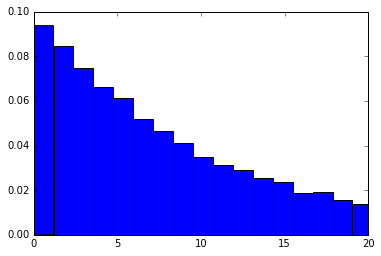

In [7]:
samples = [parameter.random() for i in range(20000)]

from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(samples, bins=100, normed=True)
plt.xlim([0,20])

In [12]:
mcmc = pm.MCMC([data, parameter])
mcmc.sample(100000, 10000)

 [-----------------100%-----------------] 100000 of 100000 complete in 7.2 sec

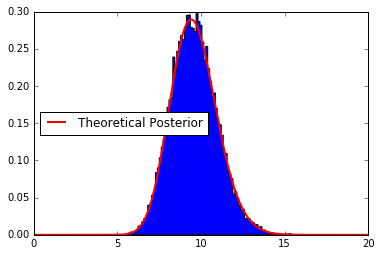

In [13]:
plt.hist(mcmc.trace("poisson_param")[:], bins=100, histtype="stepfilled", normed=True)
plt.xlim([0,20])

plt.plot(pars['mu'], 2.9*posterior, color='r', lw=2)
plt.legend(["Theoretical Posterior"], loc="best")

# Bayesians have posterior distributions
- a probability distribution $p(\theta|X_1,X_2,\cdots,X_n)$ over parameter $\theta$ conditional on observable data (_"theta given data"_)
- and can therefore make probabilistic statements about $\theta$
- e.g., the **probability** that $\theta$ is greater than some null hypothesis $H_0: \theta = \theta_0$

### **Bayesian's don't use *statistics***

# What else do Bayesians have?
- A prior where they can put subjective _"prior belief"_ into an analysis
- An easily intreptable and consistent system for "_updating belief"_ after seeing data
- Fully integrated uncertainty propegation in complex hierarchical models 
- Immediate formalization and integration of regularization within a fully coherent framework 


# What do Frequentists have?
- Asymptotic distributional approximations that sometimes work
- $H_0$'s that don't have probabistic interpretations -- they're either right or wrong only
- test statistics and critical values for rejecting null hypothesis $H_0$
   - p-values to measure evidence against the null hypothesis $H_0$
   - p-values aren't the probability that the null is true
- confidence intervals to give plausible ranges for parameters 
- a lot of envy

# How is Bayesian analysis similar to bootstrapping?

### Suppose you have posterior distributions for $\theta_1$ and $\theta_2$: how can you say which is larger?

# Even more context

* Bayesian care _completely_ about uncertainty assessment for the parameters in their model
* Frequentists _do_ characterize uncertainty -- but not at the parameter level 
    * Frequentists characterize the uncertainty (long run "frequency" behavior) of their _estimation procedures_
* Machine Learning procrastenates on examining uncertainty until they examine model predictive performance

# What is a prior?

# What is a posterior?

# Arguments for Bayesian Analysis
* Ease of interpretability

     probability statements about parameters are more easily interpreted than confidence intervals, hypothesis testing and p-values  


* Utilizes _prior_ information

    the Bayesian framework is a natural mechanism to incorporate, build upon and grow information, i.e., learn in an sequential and iterative manner



* No "large n" asymptotic distribution requirements

    Bayesian analysis is a fully coherent probabilistic framework regardless of sample size, whereas many Frequentist methodologies (vaguely) rely upon "large n" results
    
    
* Complex hierarchical data models

    many complicated modeling specifications are _only_ available within the Bayesian computational framework
    
    
* Uncertainty propegation 

     Bayesian analysis provides a hierarchical modeling framework that definitionally incorporates all modeled uncertainty into parameter estimation



* Performs regularization

    the prior specification can stabilize model fitting procedures so they are less prone to overfitting data




# Arguments against Bayesian Analysis
## (and these are substantial; I personally heavily subscribe to the last two subpoints)
## (i.e., _Occam's Razor_ and _Murphy's Law_, yo...)

* _Requires_ specification of the _prior_ 

    allows objectivity to be sacrificed for subjectivity -- arbitrary information can be  incorporated into Bayesian analysis
    
    
* Bayesian computation has more overhead/is more expensive than Frequentist computation on a number of levels:

    * Bayesian analysis requires practitioners with more advanced skill sets

    * Bayesian analysis is more difficult to implement correctly
    
    * simple Frequentist solutions often outperform complex Bayesian solutions at a fraction of total development and computational costs
    

    
